## Explore the app_events dataset

In [3]:
# imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline


In [2]:
app_event = pd.read_csv('app_events.csv')

In [4]:
app_event.head(20)

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1
5,2,4775896950989639373,1,1
6,2,-8022267440849930066,1,0
7,2,9112463267739110219,1,0
8,2,-3725672010020973973,1,0
9,2,7167114343576723123,1,1


In [5]:
app_event.shape

(32473067, 4)

In [6]:
len(app_event.event_id.unique())

1488096

In [7]:
len(app_event.app_id.unique())

19237

In [50]:
app_event_cleaned = app_event.drop_duplicates()

In [51]:
app_event_cleaned.shape

(32473067, 4)

**So there are no duplicated rows.**

### Most installed app

In [9]:
installed = app_event.groupby('app_id')['is_installed'].sum()
installed.sort_values(ascending = False, inplace = True)

In [11]:
installed.head()

app_id
8693964245073640147    1151391
5927333115845830913     898788
4348659952760821294     795995
628020936226491308      620659
3433289601737013244     373186
Name: is_installed, dtype: int64

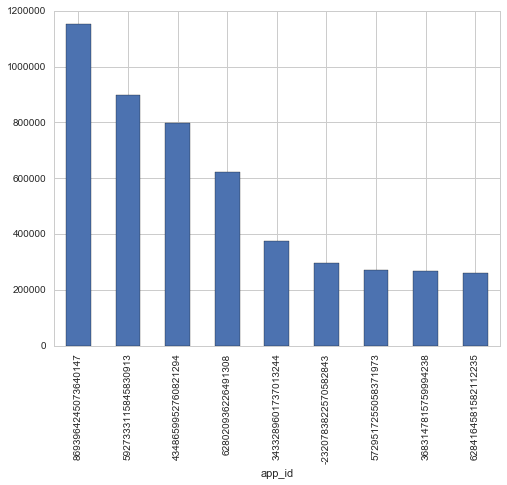

In [16]:
mpl.rcParams['figure.figsize'] = (8.0, 6.0)
installed[0:9].plot(kind = 'bar')

### Most active app

In [12]:
active = app_event.groupby('app_id')['is_active'].sum()
active.sort_values(ascending = False, inplace = True)

active.head()

app_id
8693964245073640147    918156
5927333115845830913    617102
4348659952760821294    427541
3433289601737013244    373186
628020936226491308     349882
Name: is_active, dtype: int64

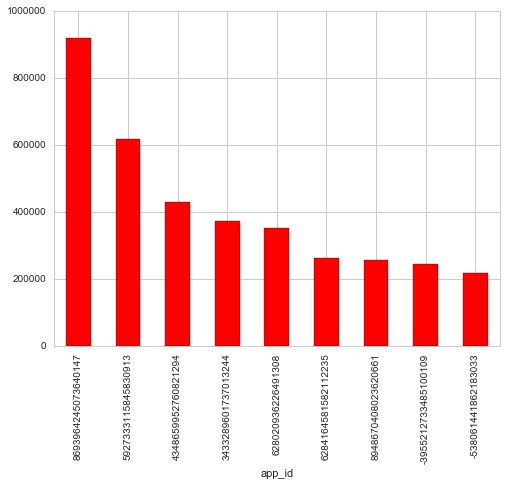

In [17]:
active[0:9].plot(kind = 'bar', color = 'red')

### Installed and active

In [18]:
i_a = app_event[(app_event.is_active == 1) & (app_event.is_installed == 1)].groupby('app_id')['is_installed'].sum()
i_a.sort_values(ascending = False, inplace = True)

In [19]:
i_a.head()

app_id
8693964245073640147    918156
5927333115845830913    617102
4348659952760821294    427541
3433289601737013244    373186
628020936226491308     349882
Name: is_installed, dtype: int64

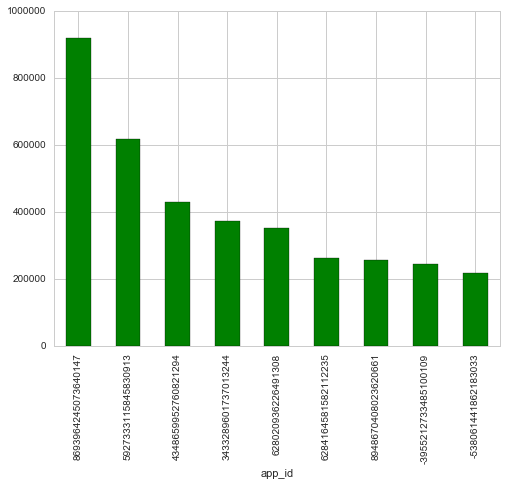

In [20]:
i_a[0:9].plot(kind = 'bar', color = 'green')

## Explore the label_categories dataset

In [21]:
label_category = pd.read_csv('label_categories.csv')

In [22]:
label_category.head(10)

,label_id,category
0,1,NaN
1,2,game-game type
2,3,game-Game themes
3,4,game-Art Style
4,5,game-Leisure time
5,6,game-Cutting things
6,7,game-Finding fault
7,8,game-stress reliever
8,9,game-pet
9,10,game-Answer


There are null values in category.

In [23]:
label_category.shape

(930, 2)

In [24]:
label_category.category.nunique()

835

In [54]:
label_category['category'].isnull().sum().sum()

3

In [64]:
(label_category['category'] == 'unknown').sum()

26

**835 unique category with 3 NaN, 26 unknown. Looks like there are duplicated category names.**

In [25]:
label_category.label_id.nunique()

930

**The label ids are all unique. So there are label ids associated with more than 1 categories.**

## Merge label_categories and app_labels

In [26]:
app_label = pd.read_csv('app_labels.csv')

In [27]:
app_label.head(10)

,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406
5,8694625920731541625,407
6,1977658975649789753,406
7,1977658975649789753,407
8,7311663864768030840,256
9,5902120154267999338,256


In [28]:
app_label.shape

(459943, 2)

In [29]:
app_label.app_id.nunique()

113211

In [30]:
app_label.label_id.nunique()

507

In [44]:
app_label_cleaned = app_label.drop_duplicates()

In [45]:
app_label_cleaned.shape

(459452, 2)

**So there are duplicated app_id/label_id combinations. The cleaned dataframe will be used.**

In [46]:
app_label_category = pd.merge(app_label_cleaned, label_category, on = 'label_id', how = 'inner')

In [47]:
app_label_category.head()

,app_id,label_id,category
0,7324884708820027918,251,Finance
1,-4494216993218550286,251,Finance
2,8756705988821000489,251,Finance
3,1061207043315821111,251,Finance
4,-1491198667294647703,251,Finance


In [48]:
app_label_category.shape

(459452, 3)

In [55]:
# Look at categories for the top 3 most-installed and most-active apps 
# app_id: 8693964245073640147, 5927333115845830913, and 4348659952760821294 

top_app = app_label_category.loc[app_label_category['app_id'].isin([8693964245073640147, 5927333115845830913, 4348659952760821294])]

In [57]:
top_app.sort('app_id')

,app_id,label_id,category
2192,4348659952760821294,251,Finance
255344,4348659952760821294,730,And the Church
249075,4348659952760821294,780,Moderate profitability
246447,4348659952760821294,773,High Flow
237801,4348659952760821294,786,Low risk
237105,4348659952760821294,759,Third party payment
230123,4348659952760821294,756,Internet banking
117328,4348659952760821294,262,Pay
454889,4348659952760821294,1008,Pay
59864,4348659952760821294,548,Industry tag


**Each app belongs to multiple categories.**

## Merge app_event and app_label_category

In [58]:
# app_event is a large dataset, so we just sample part of the dataset 

app_event2 = app_event.sample(500000)

In [60]:
app_event_with_label = pd.merge(app_event2, app_label_category, on = 'app_id', how = 'inner')

In [61]:
app_event_with_label.head(10)

,event_id,app_id,is_installed,is_active,label_id,category
0,2624631,8948670408023620661,1,1,548,Industry tag
1,2624631,8948670408023620661,1,1,713,Services 1
2,2624631,8948670408023620661,1,1,704,Property Industry 2.0
3,2442851,8948670408023620661,1,1,548,Industry tag
4,2442851,8948670408023620661,1,1,713,Services 1
5,2442851,8948670408023620661,1,1,704,Property Industry 2.0
6,232441,8948670408023620661,1,1,548,Industry tag
7,232441,8948670408023620661,1,1,713,Services 1
8,232441,8948670408023620661,1,1,704,Property Industry 2.0
9,2898657,8948670408023620661,1,1,548,Industry tag


### Most-installed and active app categories

In [62]:
i_a2 = app_event_with_label[(app_event_with_label.is_active == 1) 
                            & (app_event_with_label.is_installed == 1)].groupby('category')['is_installed'].sum()
i_a2.sort_values(ascending = False, inplace = True)

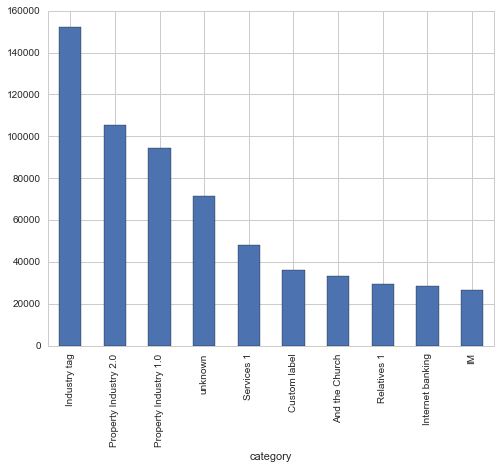

In [63]:
i_a2[0:10].plot(kind = 'bar')